In [2]:
import pandas as pd
import os
import math      
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import time
import warnings 
import seaborn as sns 
warnings.filterwarnings('ignore') 

In [3]:
B_data=pd.read_csv("../../dataSet/B_data_time.csv")
T_data=pd.read_csv("../../dataSet/T_data_time.csv")

In [4]:
lables=["Volume(%)","Height(um)","Area(%)" , "OffsetX(mm)" ,"OffsetY(mm)"]

In [5]:
B_data.value_counts("JOB")

JOB
GT30-V2.8-00-BOT-10    6557880
dtype: int64

### 单标签的聚类方式

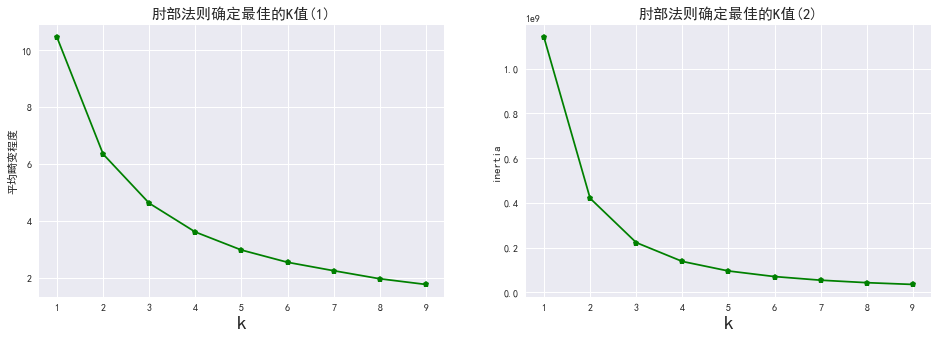

In [9]:
from scipy.spatial.distance import cdist # 计算两个输入集合的每对之间的距离。
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
plt.style.use('seaborn')
plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False #显示负号
X  = B_data[["Volume(%)"]]
K=range(1,10)

# 直接计算sse
sse_result=[]
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=666)
    kmeans.fit(X)
    sse_result.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(K,sse_result,'gp-')
plt.xlabel('k',fontsize=20)
plt.ylabel(u'平均畸变程度')
plt.title(u'肘部法则确定最佳的K值(1)',fontdict={'fontsize':15})

# 第二种，使用inertia_
L = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=666)
    kmeans.fit(X)
    L.append((k, kmeans.inertia_))
a = pd.DataFrame(L)
a.columns = ['k', 'inertia']
plt.subplot(1,2,2)
plt.plot(a.k, a.inertia,'gp-')
plt.xlabel('k',fontsize=20)
plt.ylabel('inertia')
plt.title(u'肘部法则确定最佳的K值(2)',fontdict={'fontsize':15})
plt.xticks(a.k)
plt.show();

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [14]:
data = pd.DataFrame(B_data["Volume(%)"])

In [15]:
data

,Volume(%)
0,98.832
1,95.402
2,103.047
3,105.500
4,103.741
...,...
6557875,113.166
6557876,131.565
6557877,124.038
6557878,92.592


In [16]:
n_clusters = 2
clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(data)
cluster_labels = clusterer.labels_

In [18]:
silhouette_avg = silhouette_score(data, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

KeyboardInterrupt: 

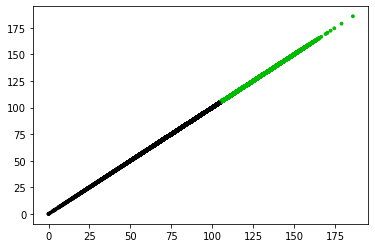

In [21]:
# sample_silhouette_values = silhouette_samples(data, cluster_labels)
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
plt.scatter(data.values[:, 0], data.values[:, 0]
            ,marker='o'
            ,s=8
            ,c=colors
           )

In [ ]:
centers = clusterer.cluster_centers_
axes[i,j].scatter(centers[:, 0], centers[:, 1], marker='x',
            c="red", alpha=1, s=200)
axes[i,j].set_title(f"The visualization of the clustered data when n_Clusters = {n_Clusters}.")
axes[i,j].set_xlabel("Feature space for the 1st feature")
axes[i,j].set_ylabel("Feature space for the 2nd feature")
axes[i,j].text(0,-17,f"The average silhouette_score is :\n\n{silhouette_avg}",fontsize=10)
n_clusters += 1
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5138351354878549
For n_clusters = 3 The average silhouette_score is : 0.6189033535825761
For n_clusters = 4 The average silhouette_score is : 0.5854073655017944
For n_clusters = 5 The average silhouette_score is : 0.48499565823838325
For n_clusters = 6 The average silhouette_score is : 0.4027118385503
For n_clusters = 7 The average silhouette_score is : 0.32542796519669565


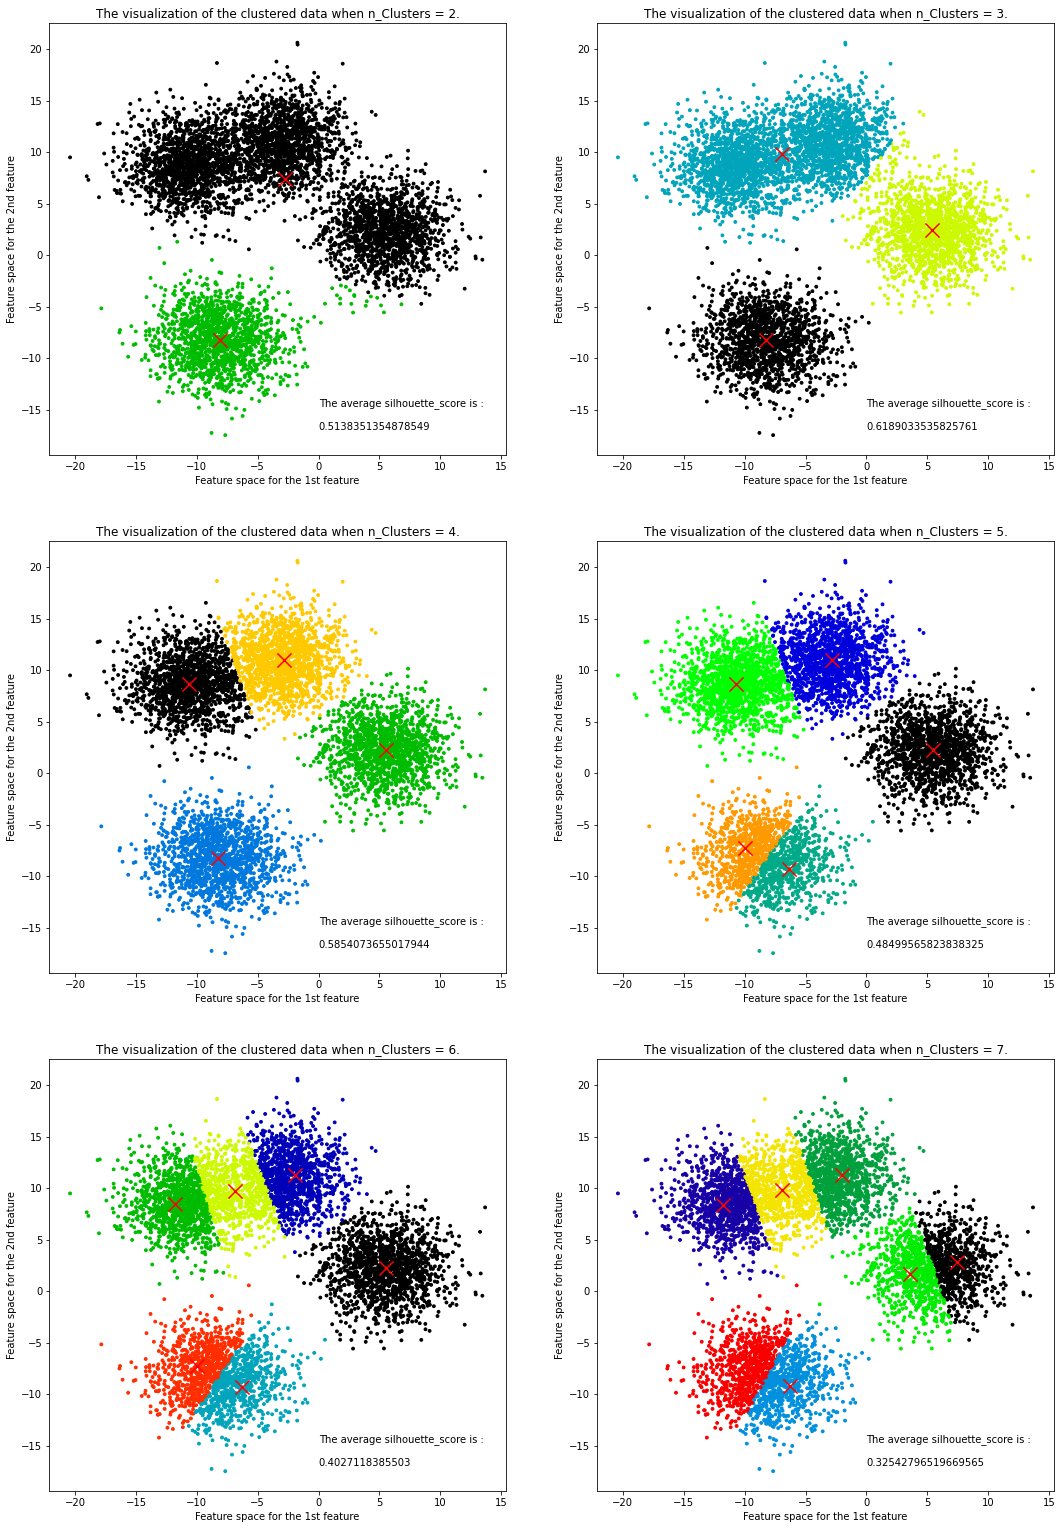

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
data = pd.DataFrame(B_data["Volume(%)"])
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(18, 27)
n_clusters = 2
for i in range(3):
    for j in range(2):
        n_clusters = n_clusters
        clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
        cluster_labels = clusterer.labels_
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        axes[i,j].scatter(X[:, 0], X[:, 1]
                    ,marker='o'
                    ,s=8
                    ,c=colors
                   )
        centers = clusterer.cluster_centers_
        axes[i,j].scatter(centers[:, 0], centers[:, 1], marker='x',
                    c="red", alpha=1, s=200)
        axes[i,j].set_title(f"The visualization of the clustered data when n_Clusters = {n_Clusters}.")
        axes[i,j].set_xlabel("Feature space for the 1st feature")
        axes[i,j].set_ylabel("Feature space for the 2nd feature")
        axes[i,j].text(0,-17,f"The average silhouette_score is :\n\n{silhouette_avg}",fontsize=10)
        n_clusters += 1
plt.show()

KeyboardInterrupt: 

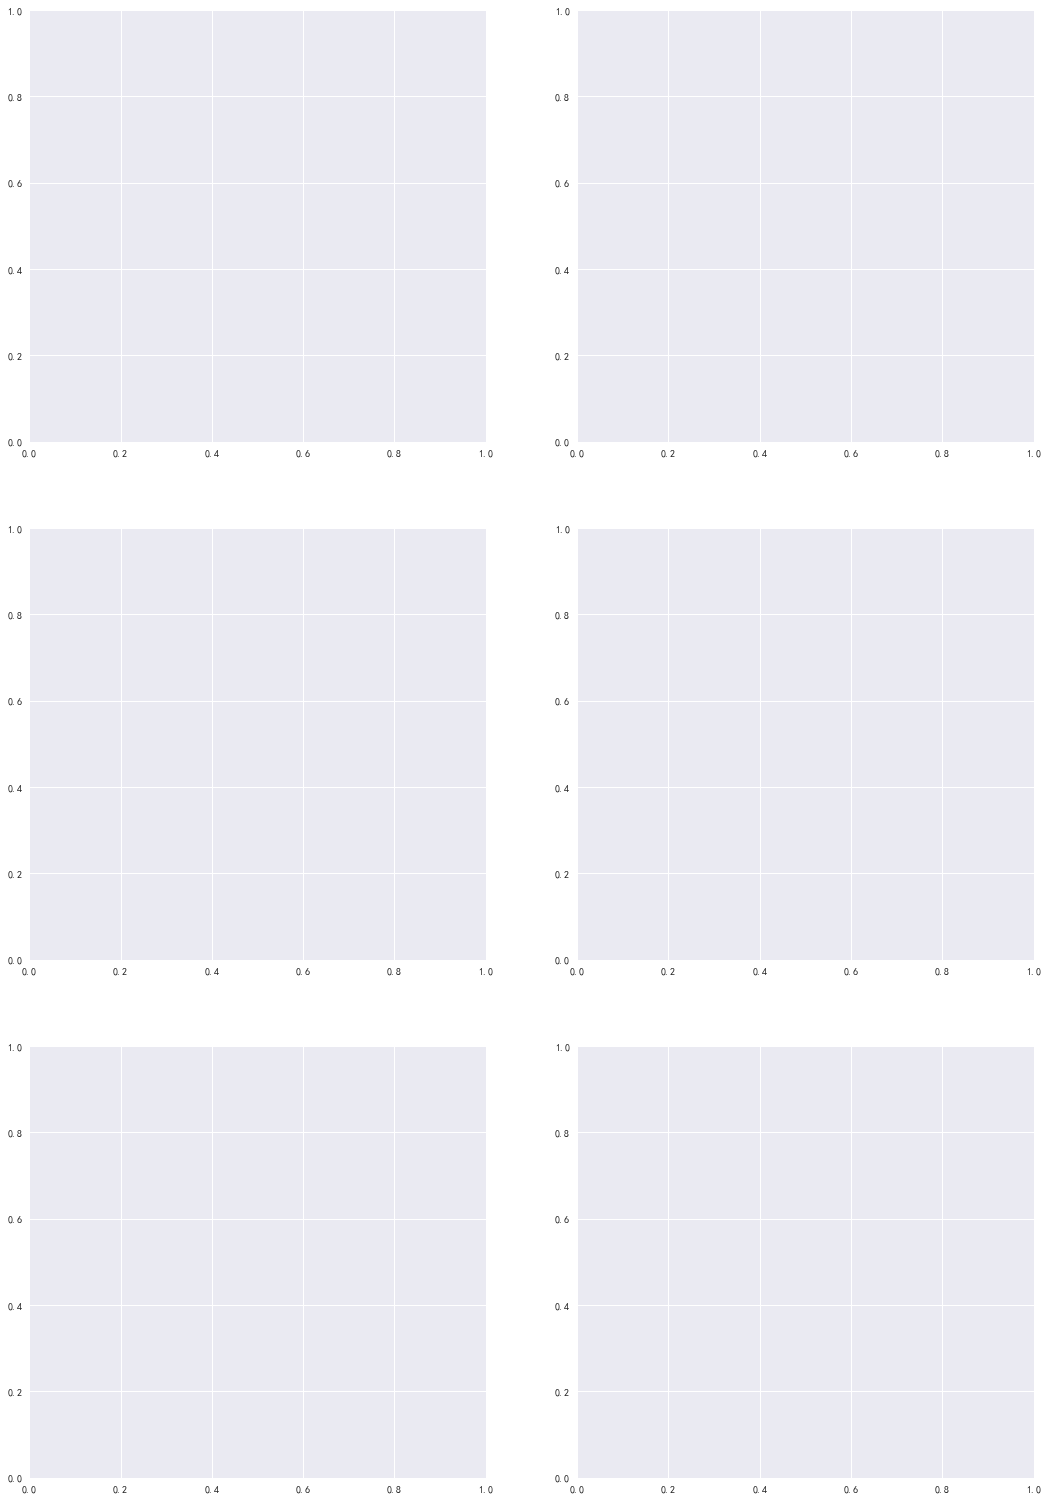

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

data = pd.DataFrame(B_data["Height(um)"])
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(18, 27)
n_clusters = 2
for i in range(3):
    for j in range(2):
        n_clusters = n_clusters
        clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
        cluster_labels = clusterer.labels_
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        axes[i,j].scatter(X[:, 0], X[:, 1]
                    ,marker='o'
                    ,s=8
                    ,c=colors
                   )
        centers = clusterer.cluster_centers_
        axes[i,j].scatter(centers[:, 0], centers[:, 1], marker='x',
                    c="red", alpha=1, s=200)
        axes[i,j].set_title(f"The visualization of the clustered data when n_Clusters = {n_Clusters}.")
        axes[i,j].set_xlabel("Feature space for the 1st feature")
        axes[i,j].set_ylabel("Feature space for the 2nd feature")
        axes[i,j].text(0,-17,f"The average silhouette_score is :\n\n{silhouette_avg}",fontsize=10)
        n_clusters += 1
plt.show()

KeyboardInterrupt: 

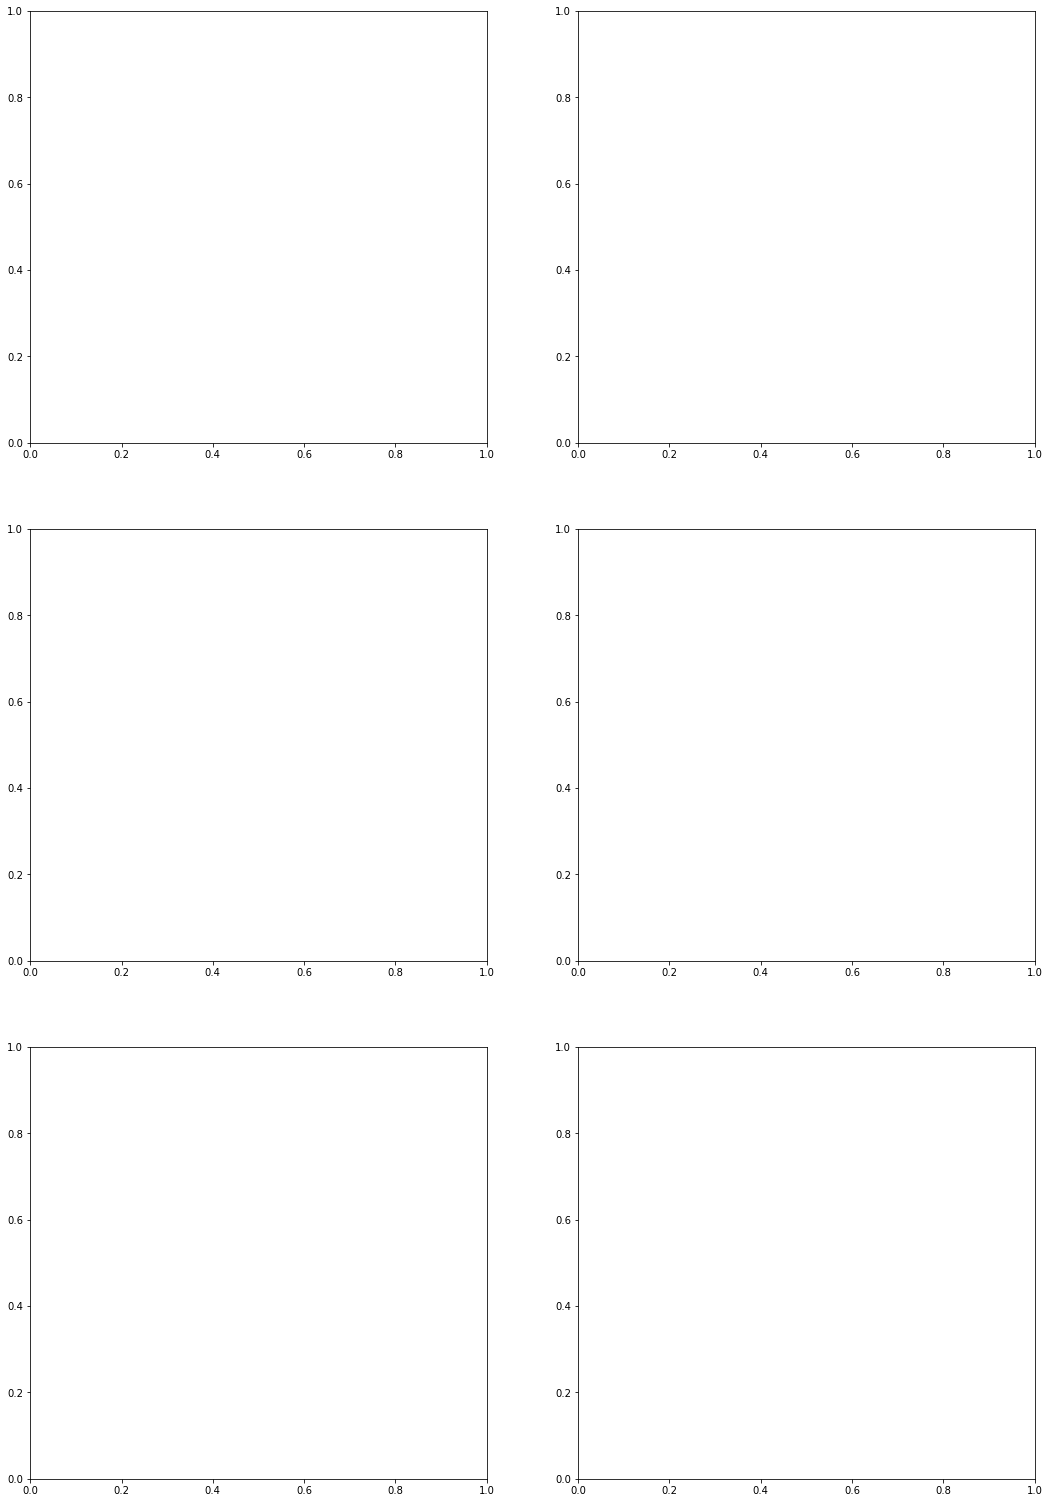

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
X  = B_data[["Area(%)"]]
data = pd.DataFrame(B_data["Area(%)"])
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(18, 27)
n_clusters = 2
for i in range(3):
    for j in range(2):
        n_clusters = n_clusters
        clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
        cluster_labels = clusterer.labels_
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        axes[i,j].scatter(X[:, 0], X[:, 1]
                    ,marker='o'
                    ,s=8
                    ,c=colors
                   )
        centers = clusterer.cluster_centers_
        axes[i,j].scatter(centers[:, 0], centers[:, 1], marker='x',
                    c="red", alpha=1, s=200)
        axes[i,j].set_title(f"The visualization of the clustered data when n_Clusters = {n_Clusters}.")
        axes[i,j].set_xlabel("Feature space for the 1st feature")
        axes[i,j].set_ylabel("Feature space for the 2nd feature")
        axes[i,j].text(0,-17,f"The average silhouette_score is :\n\n{silhouette_avg}",fontsize=10)
        n_clusters += 1
plt.show()